<a href="https://colab.research.google.com/github/chittireddyshivani/23CSBTB39-40/blob/main/STML_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
d=pd.read_csv("/content/breast_cancer_survival.csv")
d.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
y=d["Patient_Status"]
y

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Alive
...,...
329,Alive
330,Alive
331,Dead
332,Alive


In [ ]:
d.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
d.dtypes

,0
Age,int64
Gender,object
Protein1,float64
Protein2,float64
Protein3,float64
Protein4,float64
Tumour_Stage,object
Histology,object
ER status,object
PR status,object


In [ ]:
for i in d.columns:
  if d[i].dtypes==object:
    d[i]=le.fit_transform(d[i])

In [ ]:
y=d['Patient_Status']
y

,Patient_Status
0,0
1,1
2,0
3,0
4,0
...,...
329,0
330,0
331,1
332,0


In [ ]:
x=d.drop(["Patient_Status"],axis=1)
x

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,0,0,2,118,238
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,155,228
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,0,0,137,62
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,0,0,2,101,270
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,66,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,0,0,1,0,88,260
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,0,0,1,1,149,201
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,0,0,3,159,103
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,0,0,162,34


In [ ]:
d

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,0,0,2,118,238,0
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,155,228,1
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,0,0,137,62,0
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,0,0,2,101,270,0
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,66,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,0,0,1,0,88,260,0
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,0,0,1,1,149,201,0
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,0,0,3,159,103,1
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,0,0,162,34,0


In [ ]:
d.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
d['Gender'].unique()

array([0, 1])

In [ ]:
y_pred=svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6716417910447762


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier_model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNeighborsClassifier_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=KNeighborsClassifier_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6716417910447762


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression_model=LogisticRegression()

In [ ]:
LogisticRegression_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=LogisticRegression_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6716417910447762


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model=PCA(n_components=2)

In [ ]:
X_train_pca=pca_model.fit_transform(x_train)

In [ ]:
x_test_pca=pca_model.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression_model=LogisticRegression()

In [ ]:
LogisticRegression_model.fit(X_train_pca,y_train)

LogisticRegression()

In [ ]:
y_pred=LogisticRegression_model.predict(x_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accc=accuracy_score(y_test,y_pred)
acc

0.6716417910447762

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier_model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNeighborsClassifier_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=KNeighborsClassifier_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6716417910447762


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.6716417910447762


In [ ]:
from sklearn.utils import resample

In [ ]:
knn_acc=[]
svc_acc=[]
lr_acc=[]

In [ ]:
for i in range(20):
  x_resample,y_resample=resample(x,y)
  x_train_x_resample,x_test_x_resample,y_train_x_resample,y_test_x_resample=train_test_split(x_resample,y_resample,test_size=0.2,random_state=1)
  svc_model.fit(x_train_x_resample,y_train_x_resample)
  KNeighborsClassifier_model.fit(x_train_x_resample,y_train_x_resample)
  LogisticRegression_model.fit(x_train_x_resample,y_train_x_resample)
  y_pred_svc=svc_model.predict(x_test_x_resample)
  y_pred_KNeighborsClassifier=KNeighborsClassifier_model.predict(x_test_x_resample)
  y_pred_LogisticRegression=LogisticRegression_model.predict(x_test_x_resample)
  acc_svc=accuracy_score(y_test_x_resample,y_pred_svc)
  acc_KNeighborsClassifier=accuracy_score(y_test_x_resample,y_pred_KNeighborsClassifier)
  acc_LogisticRegression=accuracy_score(y_test_x_resample,y_pred_LogisticRegression)
  svc_acc.append(acc_svc)
  knn_acc.append(acc_KNeighborsClassifier)
  lr_acc.append(acc_LogisticRegression)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
xy=[i for i in range(20)]
xy

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
import matplotlib.pyplot as plt

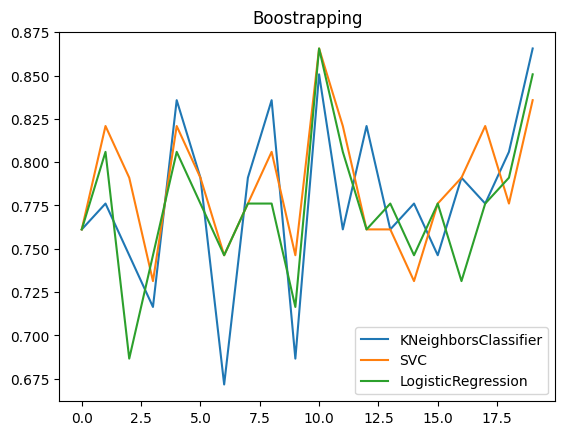

In [ ]:
plt.title("Boostrapping")
plt.plot(xy,knn_acc,label="KNeighborsClassifier")
plt.plot(xy,svc_acc,label="SVC")
plt.plot(xy,lr_acc,label="LogisticRegression")
plt.legend()
plt.show()